# Clusterização - Empresa de Cartão de Crédito

In [43]:
import pandas as pd

In [44]:
uri = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'

In [45]:
dataframe = pd.read_csv(uri)

In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [47]:
dataframe.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4450,C14574,1138.014732,1.0,1170.48,1170.48,0.00,920.050071,0.416667,0.416667,0.000000,0.250000,4,5,4500.0,1078.964657,247.324440,0.083333,12
122,C10127,2114.158683,1.0,5580.85,0.00,5580.85,0.000000,1.000000,0.000000,1.000000,0.000000,0,75,8500.0,3564.977774,630.004130,0.000000,12
7350,C17549,399.156352,1.0,2870.76,894.49,1976.27,0.000000,1.000000,0.583333,1.000000,0.000000,0,109,2500.0,3064.377023,187.846647,0.000000,12
4576,C14702,2074.364799,1.0,1500.00,1500.00,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,15,2200.0,2200.280484,1436.215703,0.000000,12
6205,C16378,4926.540711,1.0,226.63,164.79,61.84,1893.581202,0.250000,0.250000,0.083333,0.250000,4,5,5500.0,974.445304,2314.631472,0.000000,12
5176,C15321,3497.200665,1.0,1350.13,519.80,830.33,1938.008846,0.666667,0.416667,0.583333,0.166667,3,32,4000.0,1882.437447,1279.813588,0.000000,12
4851,C14985,3024.642476,1.0,0.00,0.00,0.00,2381.716886,0.000000,0.000000,0.000000,0.083333,2,0,8000.0,578.458133,1031.591500,0.000000,12
6898,C17087,3029.388362,1.0,71.99,0.00,71.99,4865.411450,0.166667,0.000000,0.166667,0.166667,2,2,7500.0,887.336500,915.671887,0.000000,12
4125,C14241,2605.600200,1.0,0.00,0.00,0.00,4127.528187,0.000000,0.000000,0.000000,0.250000,5,0,12000.0,2077.205644,601.214943,0.083333,12
5941,C16107,299.030773,1.0,805.80,540.00,265.80,0.000000,1.000000,0.083333,1.000000,0.000000,0,13,4000.0,845.966736,184.444816,0.000000,12


## Organizando os dados

In [48]:
dataframe.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)

In [49]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [50]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [51]:
dataframe.fillna(dataframe.median(), inplace=True)

missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


## Normalização dos dados

In [52]:
dataframe.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


In [53]:
from sklearn.preprocessing import Normalizer

In [54]:
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## Executando o clustering: KMeans

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, 
                n_init=10, 
                max_iter=300)

y_pred = kmeans.fit_predict(values)

Em seguida, inseriremos o n_init como 10, mas o que isso significa? O KMeans é um algoritmo não-determinístico, isto é, a cada execução, obteremos um resultado diferente. Então configurando o valor 10, dez vezes seguidas o caminho deve retornar o mesmo valor para garantir sua confiabilidade. Basicamente forçamos o algoritmo a ser executado dez vezes.

Por fim, inserimos o número máximo de interações que o algoritmo irá realizar usando max_inter, que será 300.

## Critérios de validação

Vamos conhecer algumas métricas de validação existentes, que são dividas basicamente em duas categorias: métricas externas e internas.

No caso das métricas externas, precisamos ter labels para realizar cálculos e gerar a validação. Como não temos labels, não a utilizaremos neste projeto.

As métricas internas se baseiam em dois critérios de validação, e o primeiro deles é compactação, que nos relata quão próximos estão os pontos em um mesmo cluster. Quanto mais próximos os pontos dentro de um cluster, mais compactado ele está.

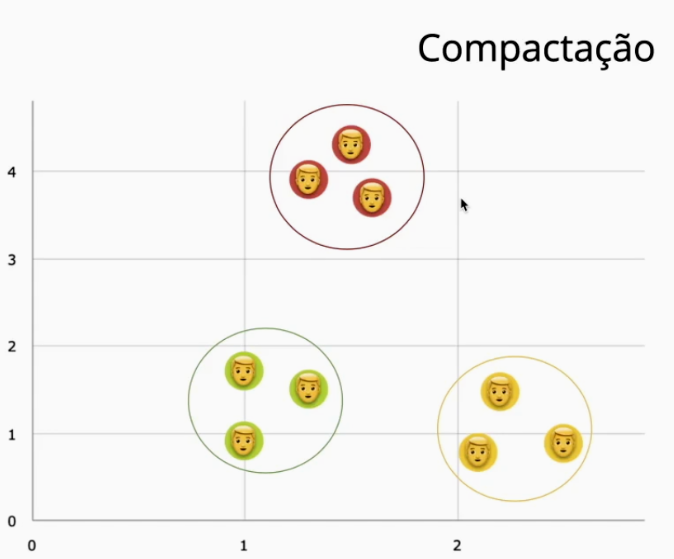

Já no segundo caso, a compactação não é tão boa para um determinado grupo, tendo um elemento dissidente, mais afastado dos outros valores do cluster, que antes pertencia a um grupo e agora passa a ser circunscrito por outro.

Desta forma, dois grupos continuam com elementos compactos, um com três pontos e o outro com dois, enquanto o terceiro cluster possui três elementos próximos e um afastado, totalizando quatro pontos.

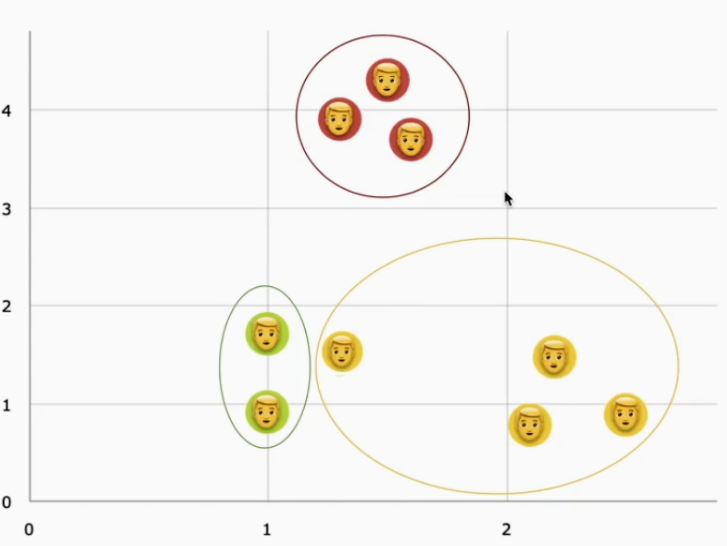

Isso indica que o segundo resultado é menos eficiente que o primeiro.

O segundo critério de validação é a separação, que indica quão bem separados estão os pontos em clusters diferentes. A ideia é justamente o contrário da compactação, quanto mais distantes estão os clusters um dos outros, melhor. Isso significa que estão mais diversificados.

Ao observarmos o primeiro exemplo de compactação, notaremos que os grupos estão bem divididos.

No segundo exemplo, a separação não está boa, afinal o elemento afastado está muito mais próximo do outro grupo. Neste caso não temos nem uma boa separação nem uma boa compactação.

## Matemática do Silhouette

Temos a fórmula para calcular o coeficiente que se baseia em dois principais valores: beta e alfa.

Coeficiente de Silhouette:


\begin{align}
        S = \frac{b - a}{max(a, b)}
    \end{align}

a = distancia média entre um ponto versus todos os outros pontos do mesmo cluster (compactação).

b = distancia media entre um ponto versus todos os outros pontos do cluster mais proximo

distancia = distancia euclidiana

max = valor maximo entre a ou b

O resultado sempre está entre 1 e -1. Consideramos que temos um bom valor se o resultado for positivo para nossos clusters serem válidos.

## Calculando o Silhouette

In [56]:
from sklearn.metrics import silhouette_score

In [57]:
labels = kmeans.labels_
silhouette = silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36454259456819194


Trata-se de um valor bom, pois é maior que 0, e o coeficiente vai de -1 até 1. Então, a partir do momento que temos um valor positivo, conseguiremos ter uma ideia se o cluster está bom de acordo com esta métrica ou não.

Quanto mais proximo de 1 estiver o valor de silhouette, mais separados estão os clusters.

## Calculando o Davies-Bouldin

In [58]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(values, labels)
print(dbs)

1.0761660873408903


The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

## Calculando o Calinski

In [59]:
from sklearn.metrics import calinski_harabasz_score

calinski = calinski_harabasz_score(values, labels)
print(calinski)

3431.794224707802


It is also known as the Variance Ratio Criterion.

The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

A higher Calinski-Harabasz score relates to a model with better defined clusters.

## Dos exercicios:

* Os indices davies-bouldin e calinski-harabasz utilizam centroides em seus calculos
* O coeficiente de silhouette não utiliza centroides em seu cálculo mas considera a distancia entre os elementos.
* A principal diferença do indice calinski em relação as outras medidas é o calculo da variancia.
* O indice calinski considera os elementos de todos os clusters.

## A validação relativa

Temos três valores para interpretarmos com diferentes métricas, mas como faremos isso?

Na métrica de Silhouette, sabemos que o valor tem um intervalo que vai de -1 até 1, portanto se o cluster obter um valor positivo isso é um bom sinal.

No caso da métrica de Davies Bouldin, quanto mais próximo de 0 o valor, melhor. 

Já para Calinski, é melhor que o valor seja o mais alto possível.

É difícil fazer qualquer avaliação se considerarmos apenas o valor "cru", e nesse ponto que apresentamos a avaliação relativa.

Compararemos o valor das métricas com base em configurações diferentes do nosso algorítimo, dos nossos caminhos. A ideia é que assim ajustemos os parâmetros do algoritimo para obtermos os melhores resultados.

In [60]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters,
                  n_init = 10,
                  max_iter = 300)
  labels = kmeans.fit_predict(dataset)

  silhouette = silhouette_score(dataset, labels, metric = 'euclidean')
  dbs = davies_bouldin_score(dataset, labels)
  calinski = calinski_harabasz_score(dataset, labels)

  return silhouette, dbs, calinski

In [61]:
def verifica_lista_clusters(lista_clusters, values):
  for cluster in lista_clusters:
    silhouette, dbs, calinksi = clustering_algorithm(cluster, values)
    print(f'Para {cluster} clusters temos:')
    print(f'Silhouette: {silhouette:.4f}')
    print(f'Davies-Bouldin: {dbs:.4f}')
    print(f'Calinksi-Harabasz: {calinski:.4f}')
    print('-' * 30)

In [62]:
lista_clusters = [3, 5, 7, 10]

In [63]:
verifica_lista_clusters(lista_clusters, values)

Para 3 clusters temos:
Silhouette: 0.3272
Davies-Bouldin: 1.3095
Calinksi-Harabasz: 3431.7942
------------------------------
Para 5 clusters temos:
Silhouette: 0.3645
Davies-Bouldin: 1.0762
Calinksi-Harabasz: 3431.7942
------------------------------
Para 7 clusters temos:
Silhouette: 0.3278
Davies-Bouldin: 1.1508
Calinksi-Harabasz: 3431.7942
------------------------------
Para 10 clusters temos:
Silhouette: 0.3042
Davies-Bouldin: 1.2009
Calinksi-Harabasz: 3431.7942
------------------------------


Selecionaremos uma desses configurações para seguir adiante e realizar outras validações.

Utilizaremos a configuração de cinco clusters, pois obtemos um resultado bom no índice de Silhouette, que é bastante popular, então é interessante utilizá-lo como medidor principal.

## Validação com dataset aleatório

Outra forma de validação é comparar os valores que obtemos do nosso dataset com outros de um banco de dados aleatório. A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas, e por conseguinte, uma estrutura capaz de ser clusterizada.

Para isso, geraremos um conjunto de dados aleatório com valores entre 0 e 1, que são os valores que temos. Utilizaremos a mesma quantidade de variáveis, isto é, 16, e a mesma quantidade de instâncias.

In [64]:
import numpy as np

random_data = np.random.rand(8950, 16)

s, dbs, calinski = clustering_algorithm(5, random_data)
print(f'S aleatorio: {s:.4f} ; DBS aleatorio: {dbs:.4f} ; Calinski aleatorio: {calinski:.4f}')

s, dbs, calinski = clustering_algorithm(5, values)
print(f'S values: {s:.4f} ; DBS values: {dbs:.4f} ; Calinski values: {calinski:.4f}')

S aleatorio: 0.0402 ; DBS aleatorio: 3.4819 ; Calinski aleatorio: 306.6724
S values: 0.3644 ; DBS values: 1.0759 ; Calinski values: 3431.7894


Temos uma diferença grande entre nosso banco de dados original e o conjunto aleatório, o que é bom para nossa validação.

Para o conjunto aleatório o valor de silhoutte foi de aproximadamente 0,04 e para o nosso 0,36. Isso mostra que nem sempre apenas ter um valor positivo é suficiente.

Para Baouldin, teremos 3,5 e 1.07, e como quanto menor o valor, melhor a métrica. Já para o Calinski, teremos a gritante diferença entre 300 e 3431.

## A estabilidade dos clusters

Nosso próximo passo é validar a estabilidade do cluster. A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

Começaremos dividindo a base utilizando a função np.array_split() recebendo o conjunto values e a quantidade de divisões, que neste caso será 3.

In [65]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3689633507303375 1.056111437621245 1204.095547712886
0.3543882290314034 1.1349921275771933 1194.797547542756
0.36704188760608253 1.0984932613776763 1167.5309516804


Teremos valores parecidos nas três colunas e com as métricas diferentes, isso indica que nosso cluster é válido.

## Analisando os valores

Aprenderemos uma estratégia para selecionar o atributo mais significativo e analisá-lo. Nos basearemos nos centroides para tomar nossas decisões.

Utilizaremos o kmeans para coletar os centroides na variável centroids usando .cluster_centers_, e depois imprimiremos da seguinte maneira:

In [66]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.59954746e-01 2.45570204e-04 4.38918210e-01 2.57249491e-01
  1.81840788e-01 2.53005800e-02 2.04597888e-04 8.90823196e-05
  1.50789074e-04 9.35406357e-06 1.69104232e-04 6.18003273e-03
  6.03556414e-01 4.02439454e-01 8.55118517e-02 7.20719088e-05]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [2.34985202e-01 2.16116336e-04 6.10950792e-02 3.48777793e-02
  2.62224951e-02 3.99528545e-01 5.27944137e-05 2.06576196e-05
  3.52637889e-05 6.53253087e-05 1.56775733e-03 1.13055837e-03
  5.35698250e-01 5.97708442e-01 1.04147601e-01 2.76781866e-05]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [3.

Teremos o valor de cada um dos 16 atributos dos 5 clusters. Observaremos a variância dos centroides para um determinado atributo, isto é, coletaremos um atributo e verificaremos como se comporta nos diferentes clusters.

Como analisaremos a variância, buscaremos um atributo em que os valores sejam diferentes entre os clusters, pois assim ampliamos a chance de observar as particularidades de cada grupo.

Porém, não precisaremos fazer isso visualmente e calcular manualmente, então usaremos o cálculo da variância, conforme aprendemos nas aulas de validação.

Aqueles atributos que possuírem a maior variância serão os utilizados.

## Selecionando os atributos

Primeiramente coletaremos a quantidade de atributos em centroids[] com o valor 0 que significa a primeira linha, e tudo ficará em max, o valor máximo de atributos.

Faremos um for até o valor máximo de atributos range(max) e então faremos o print() com o nome de cada um dos atributos escrevendo dataframe.columns.values[i].

Então podemos calcular a variância com .var().

Temos os centroids[] pegaremos todos os clusters parao atributo representado por i escrevendo : entre os colchetes.

Usaremos a função len() recebendo os centroids[0] para o tamanho, e formataremos a visualização das informações por meio da função .format() com no máximo quatro casas após a vírgula.

In [67]:
max = len(centroids[0])

for i in range(max):
  if centroids[:, i].var() > 0.009:
    print(f'{dataframe.columns.values[i]}', ':',
          f'{centroids[:, i].var():.4f}')

BALANCE : 0.0224
PURCHASES : 0.0197
CASH_ADVANCE : 0.0225
CREDIT_LIMIT : 0.0360
PAYMENTS : 0.0279
MINIMUM_PAYMENTS : 0.0543


Selecionamos os atributos BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS e MINIMUM_PAYMENTS, que são aqueles que possuem apenas um zero após a vírgula.

Vamos relembrar o que cada um desses atributos representa para verificar se de fato faz sentido que eles sejam analisados em conjunto.

* BALANCE = limite disponível do cliente
* PURCHASES = valor total de compras
* CASH_ADVANCE = valor total de saques
* CREDIT_LIMIT = limite total de crédito
* PAYMENTS = valor total pago
* MINIMUM_PAYMENTS = o mínimo pago

O último atributo MINIMUM_PAYMENTS não nos interessa pois não trará muitos benefícios para a interpretação, então o removeremos da lista.

### O pq da variância dos centroides

A variância não está sendo calculada para os valores da variável em si, e sim a variância das coordenadas dos centroides.

As variáveis selecionadas serão aquelas que apresentarem uma variabilidade grande naquela coordenada do centroide. Isso faz sentido porque você deseja que os centroides estejam o mais separados possíveis uns dos outros.

Caso você selecione uma variável que possui a coordenada do centroide sem uma variância grande, os pontos de clusters diferentes ficarão muito próximos.

Dessa forma, as variáveis que possuem maiores diferenças entre os clusters serão melhor interpretadas. Caso você escolha variáveis com a variância do centroide nula, ao analisar a diferença entre os clusters dessa variável não conseguirá tirar nenhum insight a respeito.

## Filtrando os valores

Coletaremos nosso dataframe a agruparemos nossos dados por cluster, e então especificaremos quais atributos queremos visualizar, que neste caso são "BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS".

É interessante observamos como está a distribuição dos dados, mas neste curso só utilizaremos a média mean de cada um dos atributos.

Com isso, agruparemos todos os atributos que escolhemos no lugar de apenas "BALANCE", e depois chamaremos este agrupamento de description. Como queremos a média, imprimiremos apenas description.mean().

Contudo, há um outro atributo interessante de observarmos: o relacionado à quantidade de elementos do grupo. Escreveremos n_clients = description.size() para o número de clusters que temos.

Criaremos uma nova coluna para visualizar esse dado escrevendo description['n_clients'] que receberá o valor de n_clients.

Quando pegarmos a média, atribuiremos à variável description sendo igual a description.mean() para gerarmos um dataframe neste formato para podermos atribuir n_clients. Por fim, e imprimiremos description.

In [68]:
dataframe['cluster'] = labels

In [69]:
description = dataframe.groupby('cluster')['BALANCE', 
                                           'PURCHASES', 
                                           'CASH_ADVANCE', 
                                           'CREDIT_LIMIT', 
                                           'PAYMENTS']

n_clients = description.size()

description = description.mean()

description['n_clients'] = n_clients

description.round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1142.23,3274.14,179.09,4095.15,3036.23,1535
1,3037.96,385.25,1636.92,4495.77,968.89,2649
2,1794.24,480.99,3267.58,3985.74,4711.03,1075
3,443.75,629.25,141.48,5130.55,814.29,3280
4,1987.50,854.87,421.13,2227.74,1336.24,411


Desta forma, teremos todos os atributos de nosso interesse e o número total de clientes.

## Interpretando os clusters (valores mudam com os da aula. CLuster 3 e 4 saíram trocados. Isto é normal por conta do algoritimo)

Começaremos a analisar nossos clusters, atributo por atributo. Trata-se de uma análise mais subjetiva, não existe uma única maneira correta para realizá-la, contudo existem alguns direcionamentos que podem nos ajudar.

Começaremos pelo atributo "BALANCE", isto é, o valor da fatura. Começaremos com dois valores extremos. Selecionaremos o maior e menor valor para esse atributo em diferentes clusters e faremos as anotações conforme observamos.



```
CLUSTER 0: clientes com os menores valores em gastos.
CLUSTER 1: clientes com os maiores valores em gastos.
CLUSTER 2: 
CLUSTER 3:
CLUSTER 4:
```



Os outros clusters apresentam valores padrão para esse atributo, portanto não há comentários diferenciadores que possamos realizar entre os três últimos clusters.

Passaremos, então, para o atributo "PURCHASES", isto é, o valor em compras. Para este, não necessariamente precisamos fazer o mesmo esquema, e o menor valor está no cluster 1 e o maior em compras está no cluster 2, cuja diferença de valor é muito grande.

Olharemos o "CASH_ADVANCE" que diz respeito aos saques. Notaremos que o menor valor está no cluster 0, onde os clientes gastam menos no cartão de crédito, e já gastam mais no cluster seguinte. Porém, o maior valor em saques é no cluster 3.

Analisaremos os demais, anotando as particularidades em cada cluster de acordo com os valores apresentados.



```
CLUSTER 0: clientes com os menores valores em gastos. Menor valor em saques.
CLUSTER 1: clientes com os maiores valores em gastros. Menor valor em compras. Valor considerável em saques. 
CLUSTER 2: Maior valor em compras com grande diferença.
CLUSTER 3: Maior valor em saques.
CLUSTER 4:
```



Com base nas características que encontramos nos grupos por meio da análise dos três primeiros atributos, reescreveremos nossas anotações e deixaremos a interpretação mais simples.



```
CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4:
```



Sabemos que os clientes do cluster zero gastam pouco e tem o maior limite de credito, enquanto os limites seguintes estão próximos de uma média, e não precisam de anotação.



```
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4: Clientes com o menor limite.
```



Para saber dados mais precisos sobre pagamentos, olharemos o "BALANCE" e utilizaremos um atributo que não foi o selecionado previamente, mas que se relacionam: % de clientes que pagam valor total.

Vemos que o pagamento está maior do que o gasto no cluster 0, mas lembramos que há vários elementos no grupo e estamos lidando com médias, portanto não conseguiremos um valor que reflita fielmente a relação de valor gasto com pagamento.

Já no cluster 1, conseguiríamos supor que os clientes que estão devendo aproximadamente três mil e pagaram apenas novecentos, porém não temos certeza.

Como esta análise não fica tão clara, buscaremos o atributo "PRC_FULL_PAYMENT", que indica o percentual de pagamento realizado pelo cliente.

In [70]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1535.0,0.278458,0.367223,0.0,0.0,0.083333,0.545455,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,1075.0,0.117289,0.186635,0.0,0.0,0.083333,0.142857,1.0
3,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0


Notaremos pela média uma diferença entre porcentagem de pagamento em diferentes clusters, e descobriremos que os clientes do cluster 2 pagam a maior quantidade de suas faturas, assim como o cluster 1 possui a pior média de pagamento.

Por fim, veremos a quantidade de clientes em cada cluster e chegaremos às anotações (print da aula):

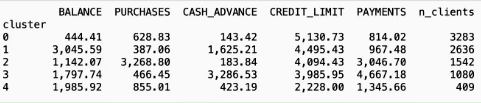



```
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.
```



## Os padrões de cada cluster

Tentaremos resumir, o máximo possível, as informações que adquirimos sobre cada cluster, já que terminamos de distribuir e observar os valores de cada atributo.

* O Cluster 0 está bastante claro na sua proposta e representam a maior quantidade de clientes, isto é, aqueles que gastam pouco e tem o maior limite, além de tudo são bons pagadores da fatura.

* O Cluster 1 representa os clientes que amais gastam, com foco no uso de cartão para saque de dinheiro e são os piores pagadores.

* O Cluster 2 representam os clientes que gastam com compras e pagam suas faturas adequadamente, o que reflete uma boa saúde financeira.

* Cluster 3 possui uma quantidade padrão de clientes que gastam muito com saques.

* Cluster 4 refletem os clientes com o menor limite no cartão e que não são bons pagadores de suas faturas, por sorte, representam a menor quantidade de clientes da empresa.



Temos nosso cinco grupos feito, criamos labels para cada um dos clusters com base nos valores do centroides e todos os outros cálculos e médias que aprendemos a elaborar.

Fizemos uma descrição razoavelmente detalhada dos clientes, não simplesmente aqueles que gastam mais ou menos, precisamos utilizar vários atributos para identificarmos diferentes perfis.

## Utilizando os clusters

Como podemos utilizar os clusters que geramos na prática? Descrevemos os padrões e caracterizamos cada grupo, mas de que forma esses dados serão aplicados?

Uma ideia é aplicar uma estratégia de negócio em um dos grupos com o objetivo de aumentar o arrecadamento de dinheiro.

O grupo mais adequado para isso seria o cluster 0, afinal ele possui o maior número de clientes, são bons pagadores, bom limite de crédito, mas gastam pouco. Nossa ideia é engajar esse grupo para que ele utilize mais o cartão de crédito.

Outro grupo interessante para aumento de lucros é o cluster 2, afinal gastam muito com compras e são os melhores pagadores. Eles não possuem um limite de crédito alto, mas uma forma de incentivar ainda mais o uso do cartão de crédito é aumentar gradativamente o limite desse grupo.

Para o grupo de apresenta os piores pagadores, teríamos de estruturar outro tipo de estratégia.

Trabalharemos com o cluster 0. Queremos que esses clientes gastem mais para incentivar o lucro na empresa. Suponhamos que a estratégia seja fazer uma parceria com uma empresa de pontos que forneça benefícios para o cliente que usar mais o crédito.

Para verificarmos se a nossa estratégia foi eficaz e utilizamos o grupo certo, faremos o chamado teste AB. Dividiremos o os clientes do cluster 0 em dois grupos: o grupo de controle e o grupo de teste.

o grupo de controle permanecerá sem nenhuma modificação, ou seja, não haverá programa de pontos. Já o grupo de teste, em um período definido, receberá o programa de pontos.

Ao final do período, verificaremos se as pessoas que participaram do programa de pontos gastaram mais com o cartão ou não. Assim teremos um resultado confiável, com clientes com características similares.